In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from os import path
from PIL import Image
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords  

1. Join 2 artists Kirk Franklin & Enya for model artist name prediction
**(NB: lyrics scrapped on other saved notebooks from where the csv files were created)**

In [2]:
df1 = pd.read_csv('kirk.csv')
print('DataFrame kirk has ', df1.shape[0], ' rows and ', df1.shape[1], ' columns')
df1.head(3)

DataFrame kirk has  158  rows and  3  columns


,Title,Artist,pre_clean
0,Ok,Kirk_Franklin,woke up to a world that is changing looking ou...
1,Never Alone,Kirk_Franklin,in my time i ve traveled some roads a rolling ...
2,Bleed the Same,Kirk_Franklin,i wanna say something to everyone in a spirit...


In [3]:
df2 = pd.read_csv('enya.csv')
df2.columns=['Title', 'Artist', 'pre_clean'] 
print('DataFrame enya has ', df2.shape[0], ' rows and ', df2.shape[1], ' columns')
df2.head(3)

DataFrame enya has  106  rows and  3  columns


,Title,Artist,pre_clean
0,I Don't Wanna Know,Enya,i just can t believe this man just another nig...
1,The Humming,Enya,and all the light will be will be and all th...
2,The Loxian Gate,Enya,ora beyhe o llay ay o ay a bey ah llay ora be...


In [4]:
frames = [df1, df2]
df = pd.concat(frames)
df.columns = ['title', 'artist_name', 'lyrics'] #rename columns

In [5]:
df

,title,artist_name,lyrics
0,Ok,Kirk_Franklin,woke up to a world that is changing looking ou...
1,Never Alone,Kirk_Franklin,in my time i ve traveled some roads a rolling ...
2,Bleed the Same,Kirk_Franklin,i wanna say something to everyone in a spirit...
3,Bleed the Same (Intro),Kirk_Franklin,i wanna say something to everyone in a spirit...
4,Unfinished,Kirk_Franklin,not scared to say it i used to be the one pr...
...,...,...,...
101,Na Laetha Geal M'oige,Enya,ag amharc trí m óige sé mé bhí sámh gan eola...
102,The Frog Prince,Enya,deep in my dreams i saw you close by my side...
103,Dreams,Enya,you re everything my dreams have seen but w...
104,Never Get Old,Enya,god commanded his angels concerning you to gu...


### WordCloud

In [6]:
text = " ".join(review for review in df.lyrics)
stopwords = set(stopwords.words("english"))

There are 331346 words in the combination of all review.


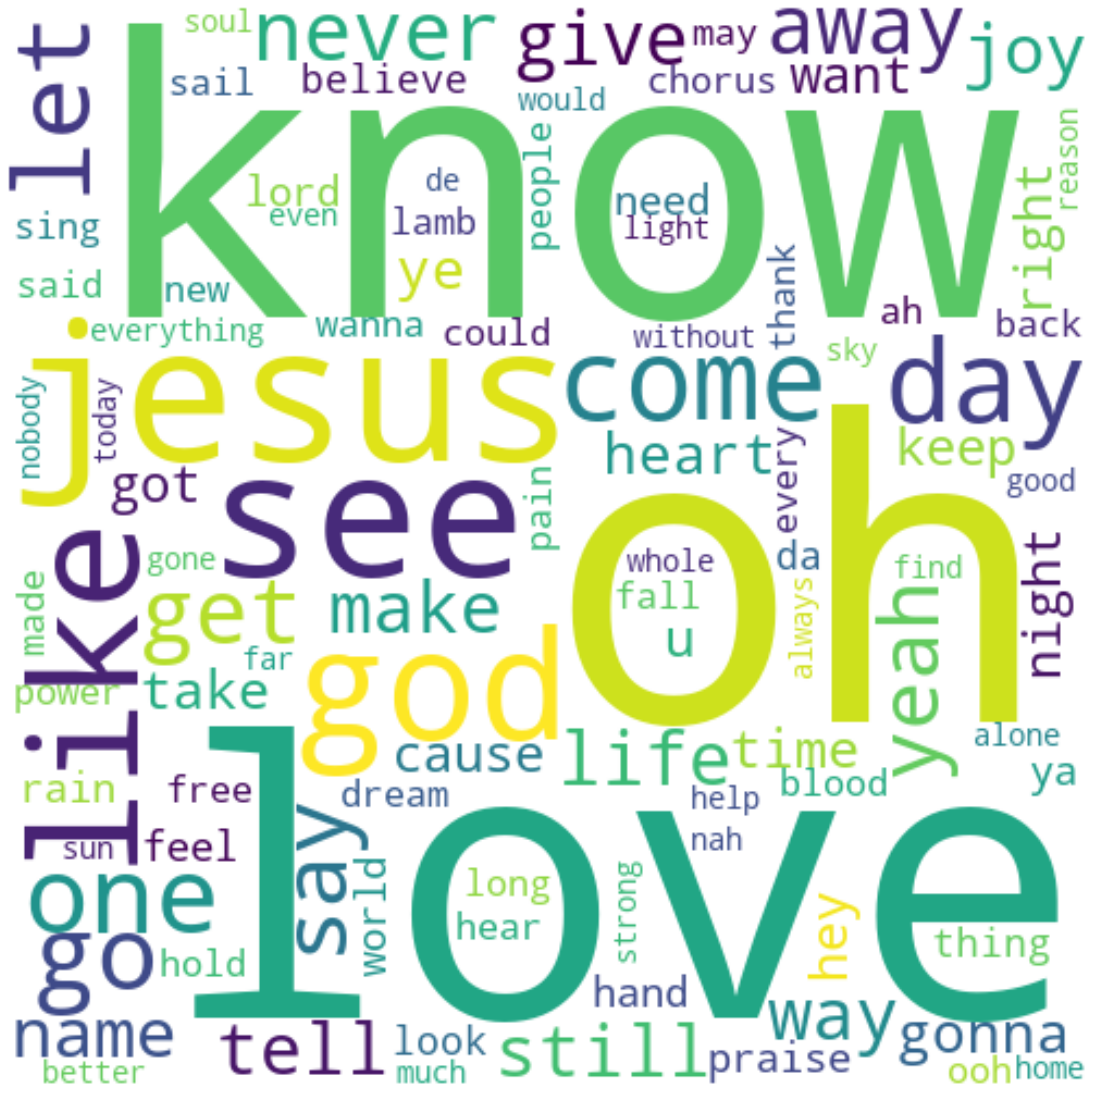

In [7]:
print ("There are {} words in the combination of all review.".format(len(text)))

mask = np.zeros((500, 500, 3), np.uint8)
mask[150:350,150:350,:] = 105  # masked out area
cloud = wordcloud.WordCloud(background_color="white",
                max_words=100,
                mask=mask, stopwords=stopwords,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(text)
                # stop words are removed!

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False    

fig, ax= plt.subplots(figsize = (20,20))
plt.axis('off')

plt.imshow(cloud, interpolation='bilinear')
plt.savefig('../Image/cloud.png')
plt.show()

There are 331346 words in the combination of all review.


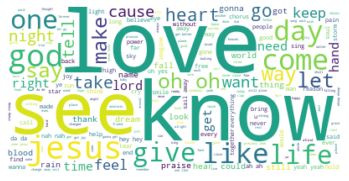

In [8]:
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["i", "m", "to", "a", "re", "me", "us", "ve", "s", "t", "ve", "re", "to", "is", "in"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, interpolation='bilinear')#,width=width,height=height)
#fig, ax= plt.subplots(figsize = (20,20))
plt.axis("off")
plt.show()

wordcloud.to_file("../Image/BOW.png")

#### Build a Text Corpus

In [9]:
#Build a Text Corpus_1
lyric_corpus= []
for i in df.lyrics:
    i = i.lower()
    lyric_corpus.append(i)

In [10]:
lyric_corpus

['woke up to a world that is changing looking out the window  got me wondering lately will we be ok  will we be ok   huh  yessuh  one day i can feel the sun shining next day a bullet can leave a momma cryin  will she be ok   lord have mercy  tell me will we be ok   truth is   life is taking everything that i have just to survive  can i testify    i got twenty five dollars in my pocket and i think another ten in my glove compartment i m trying so bad not to cry  but it s hard to stop it but you say all of my needs you promised you got it  so i m gon  be ok  hahaha yessuh  i m gon  be ok  sing  ok  ok  see i gotta remember  that my god is bigger than any battle i ll ever face so i m gon  be ok  yeah it s dark right now  huh but i still see the light  come on  why do we hate one another   yeah  when love is the most beautiful color it takes away the grey  i hope somebody s listening  and makes everything ok  huh  my lord  where is the american dream  if only one percent knows what it mean

In [11]:
len(lyric_corpus)

264

In [12]:
#Build a Text Corpus_2
corpus = df["lyrics"].tolist()
corpus

['woke up to a world that is changing looking out the window  got me wondering lately will we be ok  will we be ok   huh  yessuh  one day i can feel the sun shining next day a bullet can leave a momma cryin  will she be ok   lord have mercy  tell me will we be ok   truth is   life is taking everything that i have just to survive  can i testify    i got twenty five dollars in my pocket and i think another ten in my glove compartment i m trying so bad not to cry  but it s hard to stop it but you say all of my needs you promised you got it  so i m gon  be ok  hahaha yessuh  i m gon  be ok  sing  ok  ok  see i gotta remember  that my god is bigger than any battle i ll ever face so i m gon  be ok  yeah it s dark right now  huh but i still see the light  come on  why do we hate one another   yeah  when love is the most beautiful color it takes away the grey  i hope somebody s listening  and makes everything ok  huh  my lord  where is the american dream  if only one percent knows what it mean

In [13]:
len(corpus)

264

#### Vectorizing

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
cv.fit(corpus)
out = cv.transform(corpus)

In [15]:
#Sparse Matrix

out.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
df_cv = pd.DataFrame(out.todense(), columns=cv.get_feature_names())
df_cv

,106,11,16,17,1812,1x,2000,2010,22,2x,...,zephyrus,zion,zone,áit,áthas,ébano,éirigh,êl,óg,óige
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Tf-Idf (Normalization)

from sklearn.feature_extraction.text import TfidfTransformer

tf = TfidfTransformer()
transformed = tf.fit_transform(out)

In [18]:
df_tf = pd.DataFrame(transformed.todense(), columns=cv.get_feature_names())
df_tf.round(3)

,106,11,16,17,1812,1x,2000,2010,22,2x,...,zephyrus,zion,zone,áit,áthas,ébano,éirigh,êl,óg,óige
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.228
260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000


In [19]:
df_tf.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
# encode artist_name column to numerical
df['artist_name'] = np.where(df['artist_name'] == 'Kirk_Franklin', 1, 2)
df

,title,artist_name,lyrics
0,Ok,1,woke up to a world that is changing looking ou...
1,Never Alone,1,in my time i ve traveled some roads a rolling ...
2,Bleed the Same,1,i wanna say something to everyone in a spirit...
3,Bleed the Same (Intro),1,i wanna say something to everyone in a spirit...
4,Unfinished,1,not scared to say it i used to be the one pr...
...,...,...,...
101,Na Laetha Geal M'oige,2,ag amharc trí m óige sé mé bhí sámh gan eola...
102,The Frog Prince,2,deep in my dreams i saw you close by my side...
103,Dreams,2,you re everything my dreams have seen but w...
104,Never Get Old,2,god commanded his angels concerning you to gu...


In [21]:
# Train and test split
from sklearn.model_selection import train_test_split

# Create X and y 
X = df_tf.values
y = df['artist_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((40, 3485), (224, 3485), (40,), (224,))

In [22]:
#Decision Tree Classifier¶

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [23]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

RF = RandomForestClassifier(n_estimators=99, max_features=5, max_depth=5, min_samples_split=100,random_state=42)
RF.fit(X_train, y_train)
ypred_rf = RF.predict(X_test)

In [24]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)
ypred_gnb = gaussian.predict(X_test)

In [25]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state =42)
logreg.fit(X_train, y_train)
ypred_lr = logreg.predict(X_test)

In [26]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train, y_train)
ypred_mnb = mnb.predict(X_test)

In [27]:
## Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracies = pd.DataFrame(columns=['train', 'test'], index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes'])
model_dict = {'Logistic Regression':logreg, 'Decision Tree':tree, 'Random Forest':RF, 'GaussianNB':gaussian, 'MultinomialNB': mnb}
for name, model in model_dict.items():
    accuracies.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    accuracies.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))

accuracies = accuracies.sort_values(by='test', ascending=False)
accuracies

#this is really close, but we are going to proceed with the first two models, i.e Logistic Regression & MultinomialNB

,train,test
Logistic Regression,0.986607,0.975
MultinomialNB,0.991071,0.975
GaussianNB,1,0.95
Decision Tree,0.875,0.8
Random Forest,0.616071,0.625
Naive Bayes,NaN,NaN


In [28]:
def print_evaluations(ytrue, ypred, model):
    
    """
    Function that compares several scores for a given model 
    and returns the confusion matrix.
    """
    print('\033[1m' + '\033[94m' + 'Evaluation Scores:'.center(80)+ '\033[0m')

    accuracy = accuracy_score(ytrue, ypred)
    precision = precision_score(ytrue, ypred)
    recall = recall_score(ytrue, ypred)
    f1 = f1_score(ytrue, ypred)

    print("Accuracy: {:.1f}%, Precision: {:0.1f}%, Recall: {:.1f}%, f1_score: {:.1f}%".format(100*accuracy, 100*precision, 100*recall, 100*f1))    
    print('\n')
    
    print('\033[1m' + '\033[94m' + 'Confusion Matrix:'.center(40)+ '\033[0m')
    cm = confusion_matrix(ytrue, ypred)
    cm_df = pd.DataFrame(cm, index=["Kirk", "Enya"], columns=["Kirk", "Enya"])
    print(cm_df)
    print('\n')
    ax =sns.heatmap(cm,annot=True,fmt='.0f',cmap='jet',
                   xticklabels=['Kirk','Enya'], yticklabels=['Kirk','Enya'])
    plt.title('Confusion Matrix for '+ model)
    plt.savefig('../Image/CM '+model ,dpi=150)
    return ax

                               Evaluation Scores:                               
Accuracy: 97.5%, Precision: 96.0%, Recall: 100.0%, f1_score: 98.0%


           Confusion Matrix:            
      Kirk  Enya
Kirk    24     0
Enya     1    15




<AxesSubplot:title={'center':'Confusion Matrix for Logistic Regression'}>

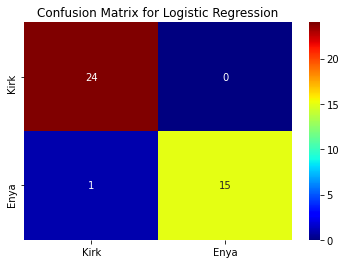

In [29]:
#Logistic Regression
print_evaluations(y_test, ypred_lr, 'Logistic Regression')

                               Evaluation Scores:                               
Accuracy: 97.5%, Precision: 96.0%, Recall: 100.0%, f1_score: 98.0%


           Confusion Matrix:            
      Kirk  Enya
Kirk    24     0
Enya     1    15




<AxesSubplot:title={'center':'Confusion Matrix for MultinomialNB'}>

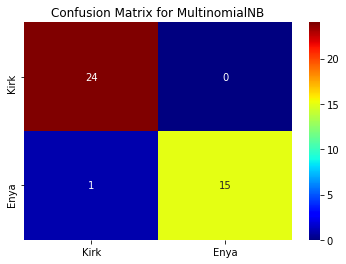

In [30]:
#MultinomialNB
print_evaluations(y_test, ypred_mnb, 'MultinomialNB')

In [36]:
import zeppelin.create_lyricscorpus as clc

ModuleNotFoundError: No module named 'zeppelin'

In [39]:
def vectors_and_df(corpus, label):
    """creates vectors for songs and returns dataframe with songs as word vectors
    by all artists"""

    tf_vec = TfidfVectorizer(stop_words="english")
    tf_vec.fit(corpus)
    corpus_vecs = tf_vec.transform(corpus)

    return pd.DataFrame(corpus_vecs.todense(), index=label,
                        columns=tf_vec.get_feature_names()), tf_vec

def predict(new_text):

    """
    Takes the pre-trained model and predicts new artist based on unseen text.

    """
    corpus = df[new_text].tolist()
    cv = CountVectorizer(stop_words='english')
    cv.fit(corpus)
    out = cv.transform(corpus)
    df_tf = pd.DataFrame(transformed.todense(), columns=cv.get_feature_names())

    X = df
    y = df.index

    model = MultinomialNB(alpha=0.005)
    model.fit(X, y)

    songlyrics = [new_text]
    # transform song into vector matrix
    new_song_vecs = cv.transform(songlyrics)
    ynew = new_song_vecs.todense()

    prediction = model.predict(ynew)
    print(f"This song belongs to {prediction}")

    return prediction[0]


In [41]:
predict('Jesus I love you')

SyntaxError: invalid syntax (<ipython-input-41-6c69f3308185>, line 1)